# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import sqrt, abs, round
import scipy.stats as stats
from scipy.stats import norm


# Extraction

In [2]:
df = pd.read_csv('../../datasets/train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Calculo de variables a utilizar en las pruebas

In [3]:
# Calculating mean, std, size of Male and Female
M_mean = df.loc[df['Gender']=='Male', 'ApplicantIncome'].mean()
F_mean = df.loc[df['Gender']=='Female', 'ApplicantIncome'].mean()
M_std = df.loc[df['Gender']=='Male', 'ApplicantIncome'].std()
F_std = df.loc[df['Gender']=='Female', 'ApplicantIncome'].std()
no_of_M = df.loc[df['Gender']=='Male', 'ApplicantIncome'].count()
no_of_F = df.loc[df['Gender']=='Female', 'ApplicantIncome'].count()

print('M_mean: ',M_mean)
print('F_mean: ',F_mean)
print('M_std: ',M_std)
print('F_std: ',F_std)
print('no_of_M: ',no_of_M)
print('no_of_F: ',no_of_F)


M_mean:  5446.460122699386
F_mean:  4643.473214285715
M_std:  6185.789261678938
F_std:  3585.381487888071
no_of_M:  489
no_of_F:  112


# Prueba Z
### Se utiliza una prueba Z para comparar la media de dos muestras dadas e inferir si pertenecen a la misma distribución o no. 
### No implementamos la prueba Z cuando el tamaño de la muestra es menor a 30.

## hipotesis
### No existe diferencias significativas entre los salarios entre hombres y mujeres

In [4]:
def twoSampZ (X1, X2, mudiff, sd1, sd2, n1, n2): 
    pooledSE = sqrt (sd1 ** 2 / n1 + sd2 ** 2 / n2) 
    z = ((X1 - X2) - mudiff) / pooledSE 
    pval = 2 * (1 - norm.cdf (abs (z))) 
    return round (z, 3), pval 

z, p = twoSampZ (M_mean, F_mean, 0, M_std, F_std, no_of_M, no_of_F)
print('Z = ', z, 'p = ', p)

Z =  1.828 p =  0.06759726635832197


In [5]:
if p < 0.05:
    print('Como el valor de pvalue es menor al margen de tolerancia, Rechazamos la hipotesis nula')
    print('Por lo tanto llegamos a la conclusión de que existe una diferencia significativa entre los ingresos de hombres y mujeres')
else:
    print('Como el valor de pvalue es mayor al margen de tolerancia, Aceptamos la hipotesis nula')
    print('Por lo tanto llegamos a la conclusión de que NO existe una diferencia significativa entre los ingresos de hombres y mujeres')


Como el valor de pvalue es mayor al margen de tolerancia, Aceptamos la hipotesis nula
Por lo tanto llegamos a la conclusión de que NO existe una diferencia significativa entre los ingresos de hombres y mujeres


# Prueba T

### También se usa una prueba t para comparar la media de dos muestras dadas, como la prueba Z. Sin embargo, se implementa cuando el tamaño de la muestra es menor a 30. Se asume una distribución normal de la muestra. También puede ser de una o dos muestras. 
### El grado de libertad se calcula mediante n-1 donde n es el número de muestras.

In [6]:

def twoSampT (X1, X2, mudiff, sd1, sd2, n1, n2): 
    pooledSE = sqrt (sd1 ** 2 / n1 + sd2 ** 2 / n2) 
    z = ((X1 - X2) - mudiff) / pooledSE 
    pval = 2 * (1 - norm.cdf (abs (z))) 
    return round (z, 3), pval 

z, p = twoSampZ (M_mean, F_mean, 0, M_std, F_std, 29, 29)
print('Z = ', z, 'p = ', p)

Z =  0.605 p =  0.5453075235582108


In [28]:
if p < 0.05:
    print('Como el valor de pvalue es menor al margen de tolerancia, Rechazamos la hipotesis nula')
    print('Por lo tanto llegamos a la conclusión de que existe una diferencia significativa entre los ingresos de hombres y mujeres')
else:
    print('Como el valor de pvalue es mayor al margen de tolerancia, Aceptamos la hipotesis nula')
    print('Por lo tanto llegamos a la conclusión de que NO existe una diferencia significativa entre los ingresos de hombres y mujeres')


Como el valor de pvalue es mayor al margen de tolerancia, Aceptamos la hipotesis nula
Por lo tanto llegamos a la conclusión de que NO existe una diferencia significativa entre los ingresos de hombres y mujeres


# Prueba de Correlación
### Una prueba de correlación es una métrica para evaluar hasta qué punto las variables están asociadas entre sí.
### Tenga en cuenta que las variables deben ser continuas para aplicar la prueba de correlación.
### Existen varios métodos para las pruebas de correlación, es decir, covarianza, coeficiente de correlación de Pearson, coeficiente de correlación de rango de Spearman, etc.


# Coeficiente de correlación de Pearson
### Se utiliza para medir la correlación lineal entre 2 variables
### Sus valores se encuentran entre -1 y 1.
### Si el valor de r es 0, significa que no hay relación entre las variables X e Y.
### Si el valor de r está entre 0 y 1, significa que hay una relación positiva entre X e Y, y su fuerza aumenta de 0 a 1. Relación positiva significa que si el valor de X aumenta, el valor de Y también aumenta.
### Si el valor de r está entre -1 y 0, significa que hay una relación negativa entre X e Y, y su fuerza disminuye de -1 a 0. Relación negativa significa que si el valor de X aumenta, el valor de Y disminuye.

### usaremos dos variables o características continuas: monto del préstamo e ingresos del solicitante . Concluiremos si existe una relación lineal entre el monto del préstamo y los ingresos del solicitante

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### como podemos apreciar hay algunos valores faltantes en la columna LoanAmount, primero, los llenaremos con el valor medio

In [53]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [54]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
# calculamos el coeficiente de correlación
pcc = np.corrcoef (df.ApplicantIncome, df.LoanAmount.astype(int))
print(pcc)

[[1.         0.56562088]
 [0.56562088 1.        ]]


### Los valores de las diagonales indican la correlación de características con ellos mismos. 0.56 representan que existe alguna correlación entre las dos características.

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

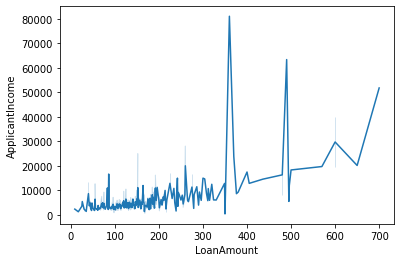

In [61]:
# graficamos la relación
sns.lineplot(data=df, x='LoanAmount', y='ApplicantIncome');

# Prueba ANOVA
### ANOVA significa Análisis de varianza. Como sugiere el nombre, utiliza la varianza como parámetro para comparar múltiples grupos independientes. 
### ANOVA puede ser ANOVA unidireccional o ANOVA bidireccional. El ANOVA de una vía se aplica cuando hay tres o más grupos independientes de una variable

### usaremos la  variable categórica Dependientes y la variable continua ApplicantIncome . Los dependientes tiene 4 grupos: 0,1,2,3+

### Hipótesis nula: no existe una diferencia significativa entre los ingresos medios entre los diferentes grupos de dependientes.

In [70]:
## revisemos el tipo de datos del campo Dependientes
print(df.Dependents.dtype)
print(df.Dependents.isnull().sum())

object
15


In [71]:
df.Dependents = df.Dependents.fillna('0')

In [72]:
print(df.Dependents.isnull().sum())

0


In [84]:
# creemos un dataset con los taos de dependientes y ingresos del aplicante
df_anova =  df[['ApplicantIncome','Dependents']]
df_anova.head()

,ApplicantIncome,Dependents
0,5849,0
1,4583,1
2,3000,0
3,2583,0
4,6000,0


In [85]:
grps = pd.unique(df.Dependents)
grps

array(['0', '1', '2', '3+'], dtype=object)

In [92]:
d_data = {grp:df_anova['ApplicantIncome'][df_anova.Dependents == grp] for grp in grps}
first_value = list(d_data.values())[0]
first_value

0      5849
2      3000
3      2583
4      6000
6      2333
       ... 
603    3676
605    2400
608    3232
609    2900
613    4583
Name: ApplicantIncome, Length: 360, dtype: int64

In [93]:
F, p = stats.f_oneway(d_data['0'], d_data['1'], d_data['2'], d_data['3+'])
print(f'F = {F}, p={p}')


F = 5.955112389949444, p=0.0005260114222572804


In [97]:
if p < 0.05:
    print('Como el valor de pvalue es menor al margen de tolerancia, Rechazamos la hipotesis nula')
    print('Por lo tanto llegamos a la conclusión de que SI existe una diferencia significativa entre los ingresos medios entre los diferentes grupos de dependientes.')
else:
    print('Como el valor de pvalue es mayor al margen de tolerancia, Aceptamos la hipotesis nula')
    print('Por lo tanto llegamos a la conclusión de que NO existe una diferencia significativa entre los ingresos medios entre los diferentes grupos de dependientes.')

Como el valor de pvalue es menor al margen de tolerancia, Rechazamos la hipotesis nula
Por lo tanto llegamos a la conclusión de que SI existe una diferencia significativa entre los ingresos medios entre los diferentes grupos de dependientes.


# Pueba de Chi-Cuadrado

### Esta prueba se aplica cuando tiene dos variables categóricas de una población. 
### Se utiliza para determinar si existe una asociación o relación significativa entre las dos variables.

### Hay 2 tipos de pruebas de chi-cuadrado: bondad de ajuste de chi-cuadrado y prueba de chi-cuadrado para independencia, implementaremos esta última.
### El grado de libertad en la prueba de chi-cuadrado se calcula mediante (n-1) * (m-1) donde nym son números de filas y columnas respectivamente.

### Usaremos dos características categóricas  Género y Estado del préstamo y encontraremos si existe una asociación entre ellas usando la prueba de chi-cuadrado.
### Hipótesis nula: no existe una asociación significativa entre las características de género y estado del préstamo.

In [134]:
# creamos el dataset con los datos a analizar
data = df[['Gender','Loan_Status']]
data

,Gender,Loan_Status
0,Male,Y
1,Male,N
2,Male,Y
3,Male,Y
4,Male,Y
...,...,...
609,Female,Y
610,Male,Y
611,Male,Y
612,Male,Y


In [135]:
# 1 steap review data type
print(data.Gender.dtype)
print(data.Loan_Status.dtype)
print(data.isnull().sum())

object
object
Gender         13
Loan_Status     0
dtype: int64


In [144]:
# fill empty data with mode
data = data.copy()
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       614 non-null    object
 1   Loan_Status  614 non-null    object
dtypes: object(2)
memory usage: 9.7+ KB


In [141]:
chiset = pd.crosstab(data.Gender, data.Loan_Status)
chiset

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


In [150]:
observed = chiset.values
observed

array([[ 37,  75],
       [155, 347]], dtype=int64)

In [160]:
# Signifact level 5% 
alpha = 0.05

In [172]:
# Grado de libertad
# El grado de libertad en la prueba de chi-cuadrado se calcula mediante (n-1) * (m-1) donde n y m son números de filas y columnas respectivamente.
# (n-1) * (m-1)
FG = (2-1) * (2-1)
FG

1

In [159]:
val = stats.chi2_contingency(chiset)
val

(0.11087854691241235,
 0.7391461310869638,
 1,
 array([[ 35.0228013,  76.9771987],
        [156.9771987, 345.0228013]]))

In [148]:
# expected value
expected = val[3]
expected

array([[ 35.0228013,  76.9771987],
       [156.9771987, 345.0228013]])

In [149]:
from scipy.stats import chi2

In [174]:
chi_square=sum([(o-e)**2./e for o,e in zip(observed,expected)])
chi_square_statistic=chi_square[0]+chi_square[1]
p_value=1-chi2.cdf(x=chi_square_statistic, df=FG)

In [1]:
print("chi-2 statistic :", chi_square_statistic)
print('Significance level: ', alpha)
print('Degree of Freedom: ', FG)
print('p-value:', p_value)

NameError: name 'chi_square_statistic' is not defined

In [179]:
if p_value < 0.05:
    print('Como el valor de pvalue es menor al margen de tolerancia, Rechazamos la hipotesis nula')
    print('Por lo tanto llegamos a la conclusión de que NO existe una asociación significativa entre las características de género y estado del préstamo.')
else:
    print('Como el valor de pvalue es mayor al margen de tolerancia, Aceptamos la hipotesis nula')
    print('Por lo tanto llegamos a la conclusión de que SI existe una asociación significativa entre las características de género y estado del préstamo.')

Como el valor de pvalue es mayor al margen de tolerancia, Aceptamos la hipotesis nula
Por lo tanto llegamos a la conclusión de que SI existe una asociación significativa entre las características de género y estado del préstamo.
